In [1]:
import numpy as np
from scipy.sparse import diags, csr_matrix, csc_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import seaborn as sns
import math

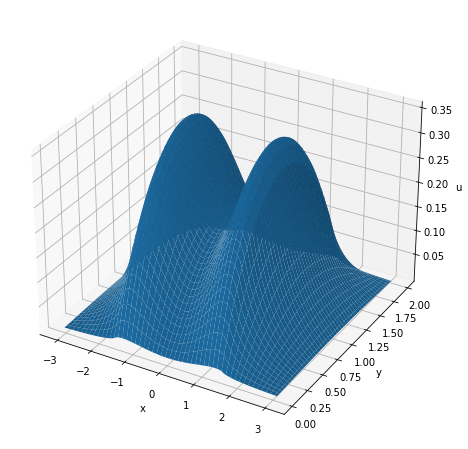

In [5]:
x_min = -np.pi #Left endpoint of x interval
x_max = np.pi  #Right endpoint of x interval
y_min = 0      #Left endpoint of y interval
y_max = 2      #Right endpoint of y interval

nxp = 101                                  # Number that determines dx
nyp = 101                                  # Number that determines dy
dx = (x_max - x_min)/nxp                   # Spacing in x direction
dy = (y_max - y_min)/nyp                   # Spacing in y direction
nx = nxp - 1                               # Number of interior points in x-axis
ny = nyp - 1                               # Number of interior points in y-axis
n = nx*ny                                  # Dimension of system
x = np.linspace(x_min+dx, x_max-dx, nx)    # Grid points in x-direction
y = np.linspace(y_min+dy, y_max-dy, ny)    # Grid points in y-direction
xg, yg = np.meshgrid(x, y)                 # Meshgrid

#mesh sizes and grid points
#dx = 0.2    # Number of grid points in x-direction
#dy = 0.4    # Number of grid points in y-direction
#nx = int((x_max - x_min)/dx)-1
#ny = int((y_max - y_min)/dy)-1
#n = nx*ny
#x = np.linspace(x_min+dx, x_max-dx, nx) # Grid points in x-direction
#y = np.linspace(y_min+dy, y_max-dy, ny) # Grid points in y-direction
#xg, yg = np.meshgrid(x, y)


# Create the diagonals
ones = np.full(n, 1)

a=np.ones(ny-1,dtype='float')
b=np.array([0.0],dtype='float')
c=np.concatenate((a,b),axis=0)
sub_diagonals = np.tile(c,nx)

# Create the offsets
offsets = [0, -1, 1, ny, -ny]

# Create the sparse matrix
#A = diags([-4*ones,sub_diagonals,sub_diagonals,ones,ones], offsets, shape=(n, n), dtype=float)
A = diags([-2*ones/dx**2 -2*ones/dy**2,sub_diagonals/dx**2,sub_diagonals/dx**2,ones/dy**2,ones/dy**2], offsets, shape=(n, n), dtype=float)

# Construct the RHS
b = np.zeros((ny,nx),dtype=float)

#for i in range(ny):
for j in range(nx):
    
    #for i in range(ny):
    
        #b[i,j] = -x[j]*y[i]
    
    if abs(x[j]) <= np.pi/2:    
            
        b[:,j] = -np.cos( x[j] )
        
b1 = b.reshape(n,1)

#Solve the linear system using a sparse matrix solver
As = csc_matrix(A)
bs = csc_matrix(b1)
u = spsolve(As, bs).reshape(ny, nx)

#Plot the solution
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xg, yg, u)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
plt.show()